<H1 style = "color : blue"> Click-through Rate Prediction </H1>

<H3 style = "color : brown"><b>Introduction:</b><br></H3>
Most of the websites we visit include ads. The online advertising industry is huge, and players such as Google, Amazon, and Facebook generate billions of dollars by targeting the correct audiences with relevant ads. Most of the decisions about ads are data-driven solutions such as the following: 

- How do you know which ad to use and who to target?
- Many companies advertise products in the same category, so how do you decide whose ad to display?
- Which ad should be placed on which part of the web page?
- Should a particular ad be pushed on a mobile device or remain on a desktop or laptop?

These decisions depend on numerous factors, including when the ad is placed, the site it is placed on, the characteristics of the people who will see the ad, the overall demographics, and more.
<br>

<H3 style = "color : brown"><b>Business Understanding: </b><br></H3>
You may have some experience of traveling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?<br>
Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue.

<H3 style = "color : brown"><b>Problem Statement:</b><br></H3>
The objective is to predict whether the audience will click on an ad or not and thus help the marketing team answer ad placement-related questions.


In [1]:
# load a library we will use in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading a data
df = pd.read_csv("data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

<H3 style = "color : brown"><b>Data Attributes</b><br></H3>

There are 27 attributes associated with each a record:

1. <b>click: </b>it is a Target Variable. 0/1 for non-click/click
2. <b>C1: </b>anonymized categorical variable
3. <b>banner_pos: </b>position of the ad/banner on the page
4. <b>site_id: </b>unique id of the site on which the ad is shown
5. <b>site_domain: </b>unique domain of the site on which the ad is shown
6. <b>site_category: </b>category of the site on which the ad is shown
7. <b>app_id: </b>app id of the site on which the ad is shown
8. <b>app_domain: </b>app category of the site on which the ad is shown
9. <b>app_category: </b>category id of the site on which the ad is shown
10. <b>device_id: </b>device id on which the add was shown
11. <b>device_ip: </b>ip address of the device on which the ad was shown
12. <b>device_model: </b>model type of the device on which the ad was shown
13. <b>device_type: </b>the device type on which the ad was shown
14. <b>device_conn_type: </b>the connection type of the device on which the ad was shown
15. <b>C14 - C21: </b>anonymized categorical variable
16. <b>hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.</b>

<b><u>Please note : </u></b>

- <b><i>C1 and C14 to C21 is Anonymized Confidential Information, which is non sharable sensitive information, can't be shared in public domain.</i></b>
- <b><i>other than Click(Target variable all other can be used as feature.</i></b>
- <b><i>this all information will be taken as input to build Classification Model</i></b>


In [4]:
df.head().T

,0,1,2,3,4
click,False,True,False,False,True
C1,1005,1005,1005,1002,1005
banner_pos,1,1,0,0,0
site_id,856e6d3f,e151e245,e3c09f3a,0da94452,1fbe01fe
site_domain,58a89a43,7e091613,d262cf1e,248e439f,f3845767
site_category,f028772b,f028772b,28905ebd,50e219e0,28905ebd
app_id,ecad2386,ecad2386,ecad2386,ecad2386,ecad2386
app_domain,7801e8d9,7801e8d9,7801e8d9,7801e8d9,7801e8d9
app_category,07d7df22,07d7df22,07d7df22,07d7df22,07d7df22
device_id,a99f214a,a99f214a,a99f214a,0fa578fd,a99f214a


In [5]:
# total Records of Dataset
df.shape

(99999, 27)

In [6]:
df.columns.values

array(['click', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19',
       'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'y'],
      dtype=object)

In [7]:
#to see all Null Values in dataset
df.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [8]:
#See Unique Value
df.nunique()

click                   2
C1                      7
banner_pos              7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_ip           78013
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
y                       2
dtype: int64

In [9]:
df.y

0        0
1        1
2        0
3        0
4        1
        ..
99994    0
99995    0
99996    1
99997    1
99998    0
Name: y, Length: 99999, dtype: int64

<H2 style = "color : brown"><b>Exploratory Data Analysis</b><br></H3>

<b><H3 style = "color : blue">1.Analysing Click (Target Variable) Feature:</H3>

In [10]:
df.click.value_counts(normalize=True) *100

False    83.01983
True     16.98017
Name: click, dtype: float64

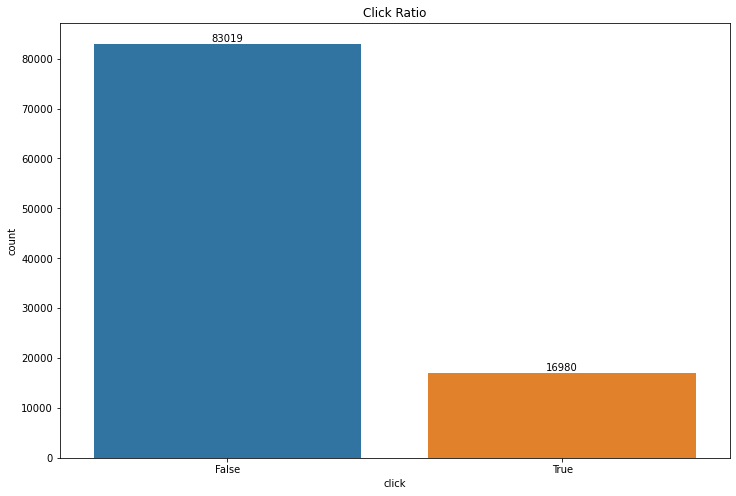

In [11]:
plt.figure(figsize=(12,8))

ax = sns.countplot(data=df , x = 'click')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Ratio')
plt.show()

<b>83% of Time user don't click on the advertisement which he sees, only 17% of time he Clicks on advertisement he sees.

<b><H3 style = "color : blue">2.Analysing Banner Position Feature:</H3>

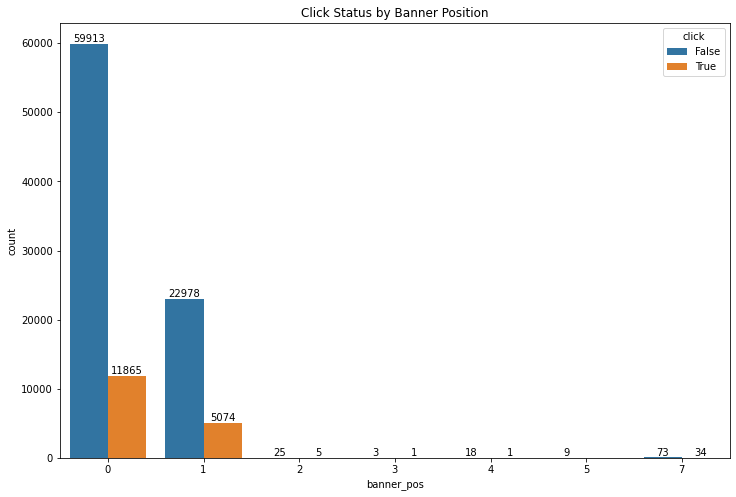

In [12]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=df.banner_pos,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by Banner Position')

plt.show()

<b> Banner Postion 0 have highest impression and 1 have 2nd highest rest hardly have any value

In [13]:
df_clicked_true = df[df['click'] == True]
df_clicked_true.head(5)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1
26,True,1005,0,239adfaf,3465fba3,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2657,3,35,100013,23,10,1,28,8,1
31,True,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2227,0,935,100075,48,10,0,27,18,1
33,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2333,0,39,-1,157,10,2,22,6,1


In [14]:
#df.banner_pos.value_counts(normalize=True) * 100

df_banner = df[['banner_pos', 'click']].groupby('banner_pos').count()
df_banner.columns = ['Impressions']
df_banner['Clicks'] = df_clicked_true[['banner_pos', 'click']].groupby('banner_pos').count()
df_banner['Clicks'] = df_banner['Clicks'].fillna(0)
df_banner['CTR'] = (df_banner['Clicks'] / df_banner['Impressions'] * 100).round(2)
df_banner = df_banner.reset_index()

print(df_banner.sort_values('CTR',ascending=False))

   banner_pos  Impressions   Clicks    CTR
6           7          107     34.0  31.78
3           3            4      1.0  25.00
1           1        28052   5074.0  18.09
2           2           30      5.0  16.67
0           0        71778  11865.0  16.53
4           4           19      1.0   5.26
5           5            9      0.0   0.00


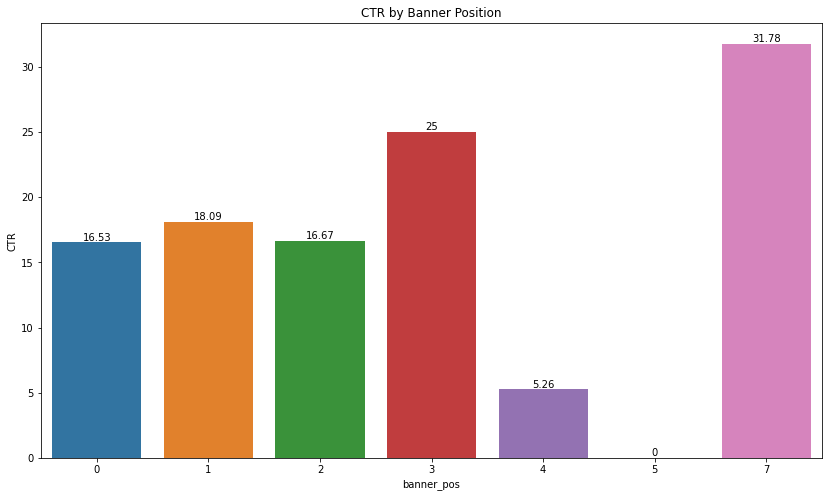

In [15]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_banner.banner_pos,y = df_banner.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by Banner Position')
plt.show()

<b><H3 style = "color : blue">3.Analysing Site Feature (Site ID, Domain and Category):</H3>

In [16]:
df[['site_id','site_domain','site_category']].nunique()

site_id          1485
site_domain      1331
site_category      19
dtype: int64

In [17]:
df.site_id.head()

0    856e6d3f
1    e151e245
2    e3c09f3a
3    0da94452
4    1fbe01fe
Name: site_id, dtype: object

<b> Dropping Site ID as it seems too many value in this column and we have site domain and Site Category Corresponding to Site ID

In [18]:
df = df.drop('site_id',axis = 1)

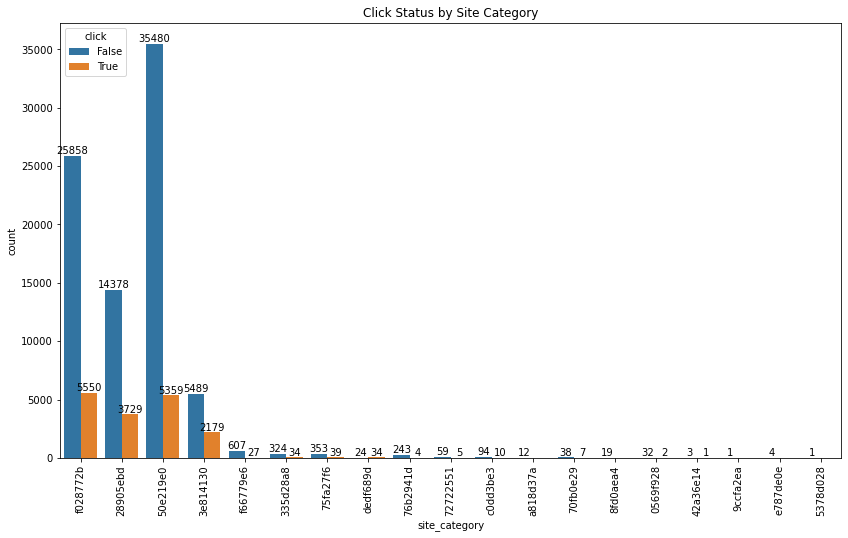

In [19]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.site_category,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by Site Category')
plt.xticks(rotation = 90)

plt.show()

In [20]:
df_site_category = df[['site_category', 'click']].groupby('site_category').count()
df_site_category.columns = ['Impressions']
df_site_category['Clicks'] = df_clicked_true[['site_category', 'click']].groupby('site_category').count()
df_site_category['Clicks'] = df_site_category['Clicks'].fillna(0)
df_site_category['CTR'] = (df_site_category['Clicks'] / df_site_category['Impressions'] * 100).round(2)
df_site_category = df_site_category.reset_index()

print(df_site_category.sort_values('CTR',ascending=False))

   site_category  Impressions  Clicks    CTR
15      dedf689d           58    34.0  58.62
3       3e814130         7668  2179.0  28.42
4       42a36e14            4     1.0  25.00
1       28905ebd        18107  3729.0  20.59
17      f028772b        31408  5550.0  17.67
7       70fb0e29           45     7.0  15.56
5       50e219e0        40839  5359.0  13.12
9       75fa27f6          392    39.0   9.95
14      c0dd3be3          104    10.0   9.62
2       335d28a8          358    34.0   9.50
8       72722551           64     5.0   7.81
0       0569f928           34     2.0   5.88
18      f66779e6          634    27.0   4.26
10      76b2941d          247     4.0   1.62
12      9ccfa2ea            1     0.0   0.00
13      a818d37a           12     0.0   0.00
11      8fd0aea4           19     0.0   0.00
16      e787de0e            4     0.0   0.00
6       5378d028            1     0.0   0.00


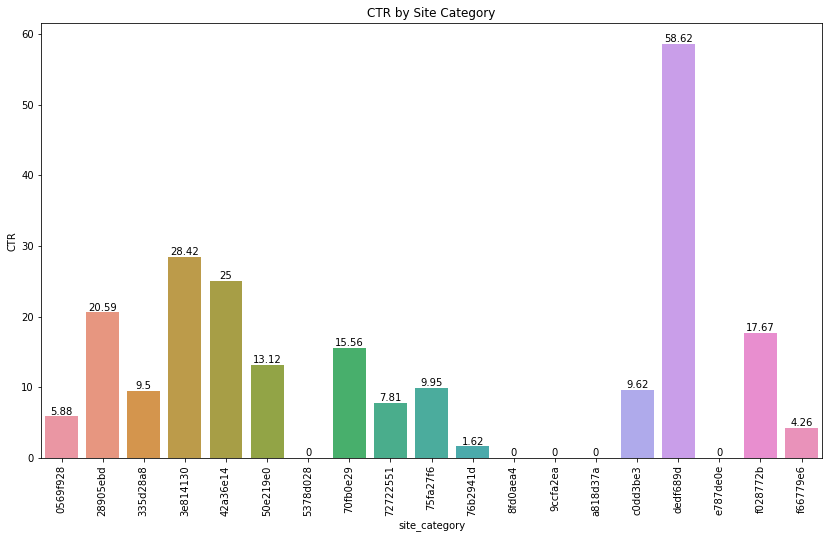

In [21]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_site_category.site_category,y = df_site_category.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by Site Category')
plt.xticks(rotation = 90)

plt.show()

<b><H3 style = "color : blue">4.Analysing App Features (App_id, app_domain and app_category):</H3>

In [22]:
df[['app_id','app_domain','app_category']].nunique()

app_id          1354
app_domain        96
app_category      21
dtype: int64

In [23]:
#Dropping App_ID
df = df.drop('app_id',axis=1)

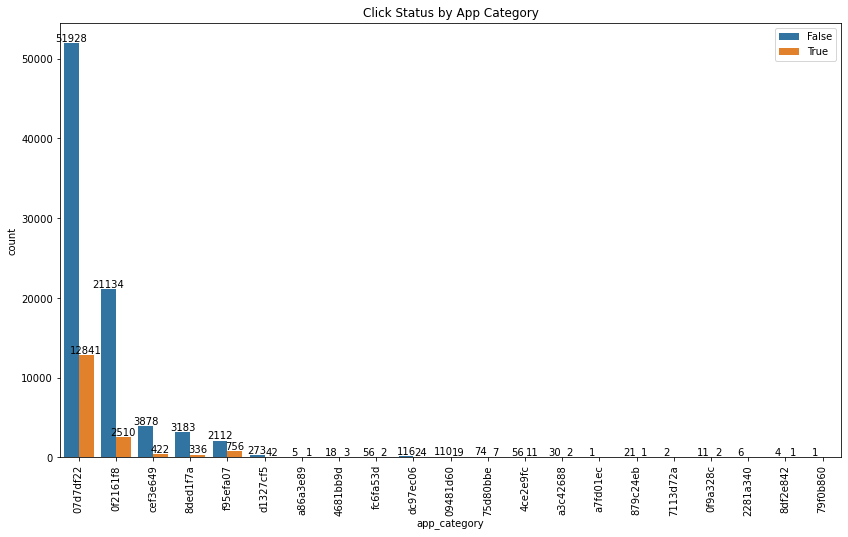

In [24]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.app_category,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by App Category')
plt.xticks(rotation = 90)
plt.legend(loc='upper right')

plt.show()

In [25]:
df_app_category = df[['app_category', 'click']].groupby('app_category').count()
df_app_category.columns = ['Impressions']
df_app_category['Clicks'] = df_clicked_true[['app_category', 'click']].groupby('app_category').count()
df_app_category['Clicks'] = df_app_category['Clicks'].fillna(0)
df_app_category['CTR'] = (df_app_category['Clicks'] / df_app_category['Impressions'] * 100).round(2)
df_app_category = df_app_category.reset_index()

print(df_app_category.sort_values('CTR',ascending=False))

   app_category  Impressions   Clicks    CTR
19     f95efa07         2868    756.0  26.36
12     8df2e842            5      1.0  20.00
0      07d7df22        64769  12841.0  19.83
18     dc97ec06          140     24.0  17.14
15     a86a3e89            6      1.0  16.67
6      4ce2e9fc           67     11.0  16.42
3      0f9a328c           13      2.0  15.38
1      09481d60          129     19.0  14.73
5      4681bb9d           21      3.0  14.29
17     d1327cf5          315     42.0  13.33
2      0f2161f8        23644   2510.0  10.62
16     cef3e649         4300    422.0   9.81
11     8ded1f7a         3519    336.0   9.55
8      75d80bbe           81      7.0   8.64
13     a3c42688           32      2.0   6.25
10     879c24eb           22      1.0   4.55
20     fc6fa53d           58      2.0   3.45
14     a7fd01ec            1      0.0   0.00
9      79f0b860            1      0.0   0.00
7      7113d72a            2      0.0   0.00
4      2281a340            6      0.0   0.00


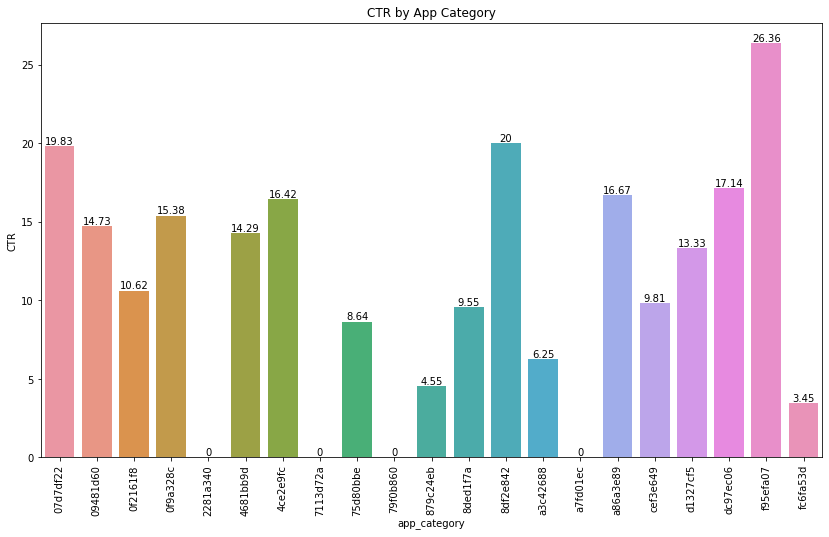

In [26]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_app_category.app_category,y = df_app_category.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by App Category')
plt.xticks(rotation = 90)

plt.show()

<b><H3 style = "color : blue">5.Analysing Device Features (device_id,device_model,device_ip, device_type and device_conn_type):</H3>

In [27]:
df[['device_id','device_model','device_ip','device_type','device_conn_type']].nunique()

device_id           16801
device_model         3145
device_ip           78013
device_type             4
device_conn_type        4
dtype: int64

In [28]:
df = df.drop(['device_id','device_ip'],axis = 1)

<B>device_type :

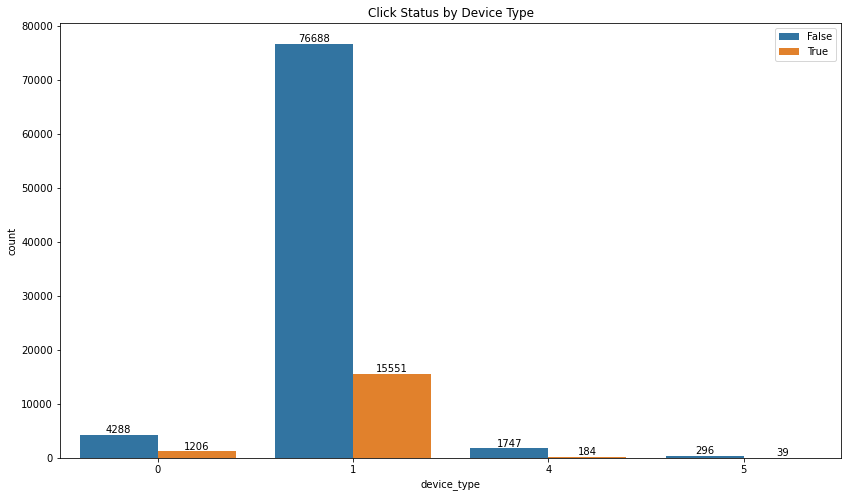

In [29]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.device_type,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by Device Type')
plt.legend(loc='upper right')

plt.show()

In [30]:
df_device_type = df[['device_type', 'click']].groupby('device_type').count()
df_device_type.columns = ['Impressions']
df_device_type['Clicks'] = df_clicked_true[['device_type', 'click']].groupby('device_type').count()
df_device_type['Clicks'] = df_device_type['Clicks'].fillna(0)
df_device_type['CTR'] = (df_device_type['Clicks'] / df_device_type['Impressions'] * 100).round(2)
df_device_type = df_device_type.reset_index()

print(df_device_type.sort_values('CTR',ascending=False))

   device_type  Impressions  Clicks    CTR
0            0         5494    1206  21.95
1            1        92239   15551  16.86
3            5          335      39  11.64
2            4         1931     184   9.53


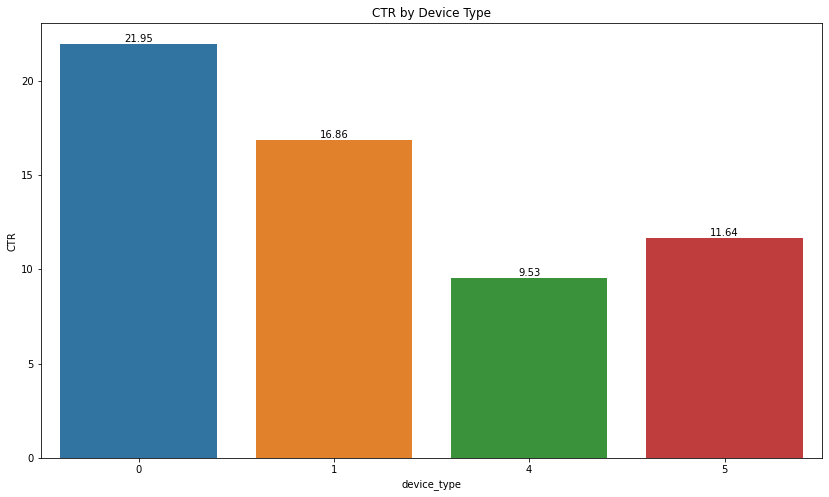

In [31]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_device_type.device_type,y = df_device_type.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by Device Type')
plt.show()

<B>device_conn_type :

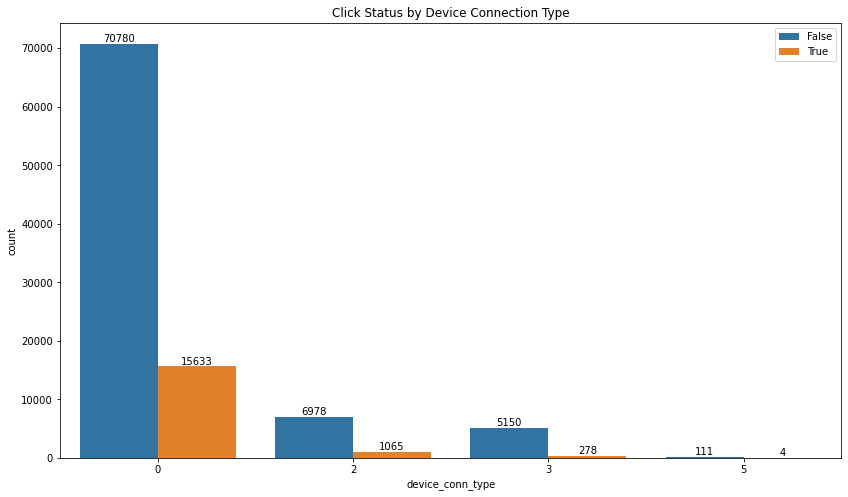

In [32]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.device_conn_type,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by Device Connection Type')
plt.legend(loc='upper right')

plt.show()

In [33]:
df_device_conn_type = df[['device_conn_type', 'click']].groupby('device_conn_type').count()
df_device_conn_type.columns = ['Impressions']
df_device_conn_type['Clicks'] = df_clicked_true[['device_conn_type', 'click']].groupby('device_conn_type').count()
df_device_conn_type['Clicks'] = df_device_conn_type['Clicks'].fillna(0)
df_device_conn_type['CTR'] = (df_device_conn_type['Clicks'] / df_device_conn_type['Impressions'] * 100).round(2)
df_device_conn_type = df_device_conn_type.reset_index()

print(df_device_conn_type.sort_values('CTR',ascending=False))

   device_conn_type  Impressions  Clicks    CTR
0                 0        86413   15633  18.09
1                 2         8043    1065  13.24
2                 3         5428     278   5.12
3                 5          115       4   3.48


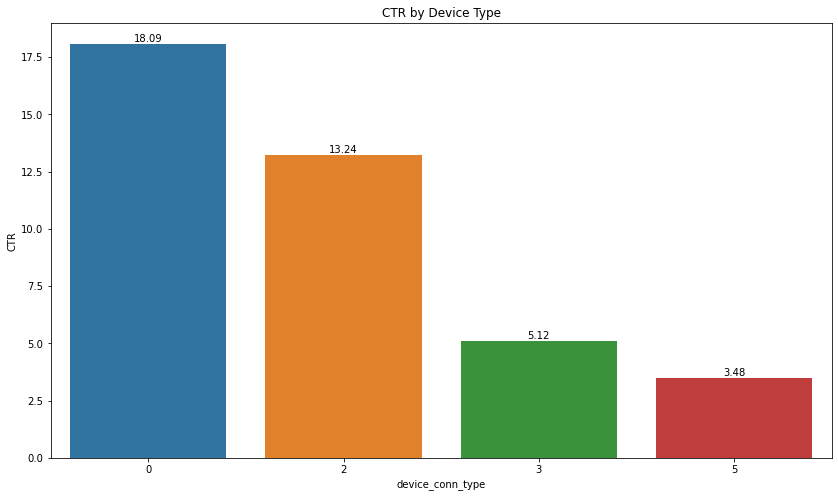

In [34]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_device_conn_type.device_conn_type,y = df_device_conn_type.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by Device Type')
plt.show()

<b><H3 style = "color : blue">5.Analysing Anonymous Features(C1,C14 to C21)</H3>

In [35]:
df[['C1','C14','C15','C16','C17','C18','C19','C20','C21']].nunique()

C1        7
C14    1722
C15       8
C16       9
C17     399
C18       4
C19      64
C20     154
C21      60
dtype: int64

<B>C1 Anonymous Function :

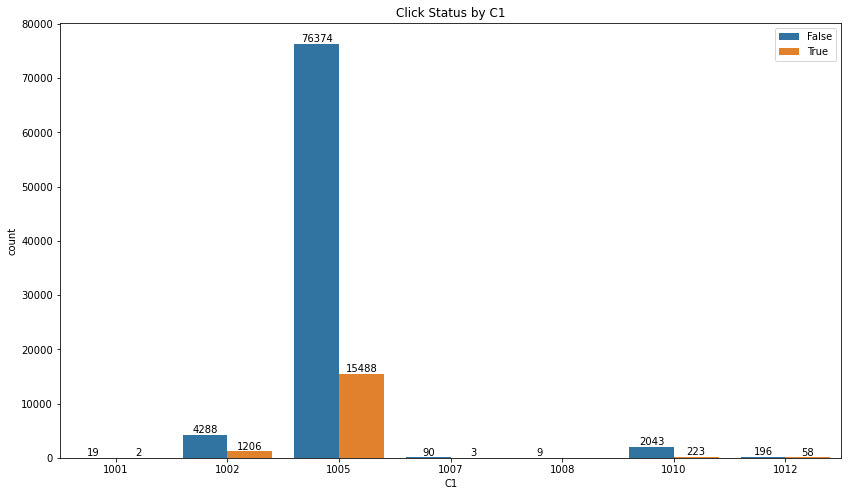

In [36]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.C1,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by C1')
plt.legend(loc='upper right')

plt.show()

In [37]:
df_C1 = df[['C1', 'click']].groupby('C1').count()
df_C1.columns = ['Impressions']
df_C1['Clicks'] = df_clicked_true[['C1', 'click']].groupby('C1').count()
df_C1['Clicks'] = df_C1['Clicks'].fillna(0)
df_C1['CTR'] = (df_C1['Clicks'] / df_C1['Impressions'] * 100).round(2)
df_C1 = df_C1.reset_index()

print(df_C1.sort_values('CTR',ascending=False))

     C1  Impressions   Clicks    CTR
6  1012          254     58.0  22.83
1  1002         5494   1206.0  21.95
2  1005        91862  15488.0  16.86
5  1010         2266    223.0   9.84
0  1001           21      2.0   9.52
3  1007           93      3.0   3.23
4  1008            9      0.0   0.00


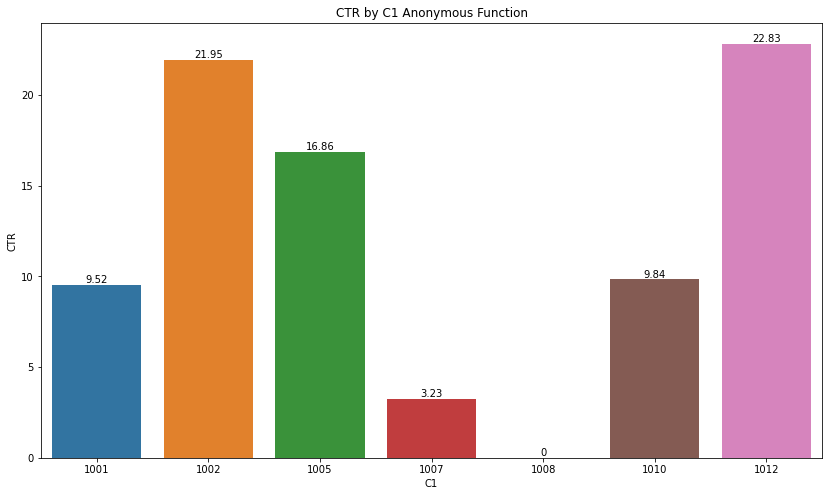

In [38]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_C1.C1,y = df_C1.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by C1 Anonymous Function')
plt.show()

<B>C15 Anonymous Function :

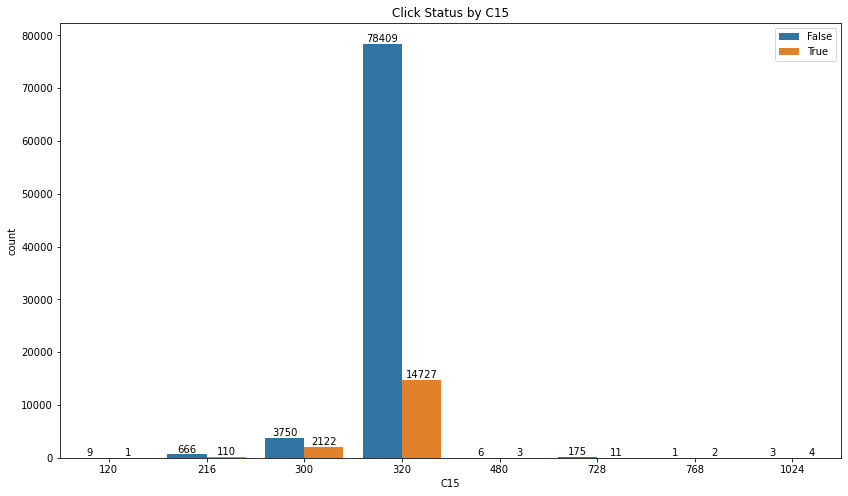

In [39]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.C15,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by C15')
plt.legend(loc='upper right')

plt.show()

In [40]:
df_C15 = df[['C15', 'click']].groupby('C15').count()
df_C15.columns = ['Impressions']
df_C15['Clicks'] = df_clicked_true[['C15', 'click']].groupby('C15').count()
df_C15['Clicks'] = df_C15['Clicks'].fillna(0)
df_C15['CTR'] = (df_C15['Clicks'] / df_C15['Impressions'] * 100).round(2)
df_C15 = df_C15.reset_index()

print(df_C15.sort_values('CTR',ascending=False))

    C15  Impressions  Clicks    CTR
6   768            3       2  66.67
7  1024            7       4  57.14
2   300         5872    2122  36.14
4   480            9       3  33.33
3   320        93136   14727  15.81
1   216          776     110  14.18
0   120           10       1  10.00
5   728          186      11   5.91


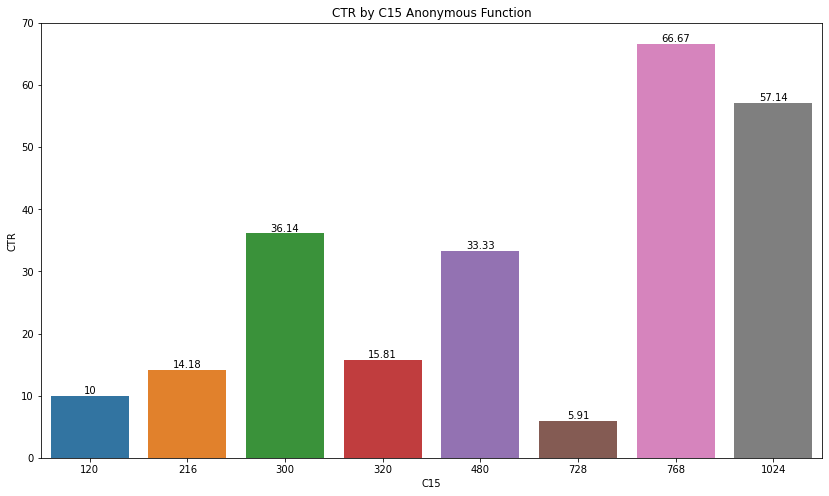

In [41]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_C15.C15,y = df_C15.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by C15 Anonymous Function')
plt.show()

<B>C15 Anonymous Function :

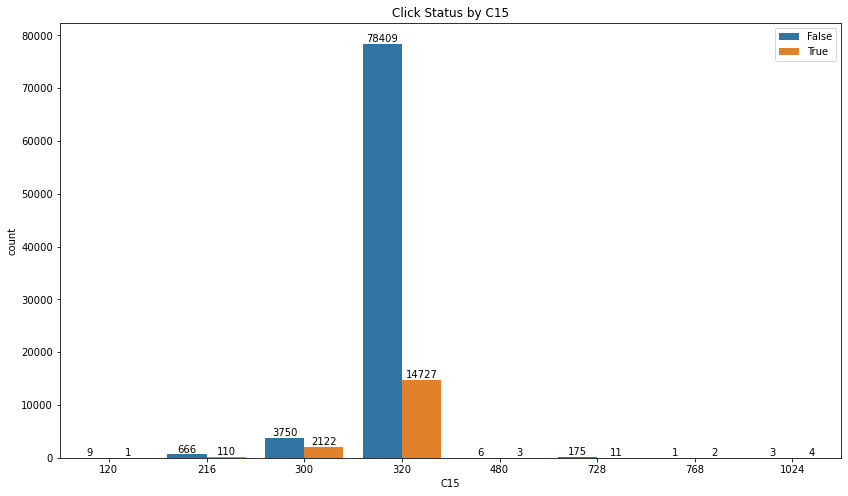

In [42]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.C15,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by C15')
plt.legend(loc='upper right')

plt.show()

In [43]:
df_C15 = df[['C15', 'click']].groupby('C15').count()
df_C15.columns = ['Impressions']
df_C15['Clicks'] = df_clicked_true[['C15', 'click']].groupby('C15').count()
df_C15['Clicks'] = df_C15['Clicks'].fillna(0)
df_C15['CTR'] = (df_C15['Clicks'] / df_C15['Impressions'] * 100).round(2)
df_C15 = df_C15.reset_index()

print(df_C15.sort_values('CTR',ascending=False))

    C15  Impressions  Clicks    CTR
6   768            3       2  66.67
7  1024            7       4  57.14
2   300         5872    2122  36.14
4   480            9       3  33.33
3   320        93136   14727  15.81
1   216          776     110  14.18
0   120           10       1  10.00
5   728          186      11   5.91


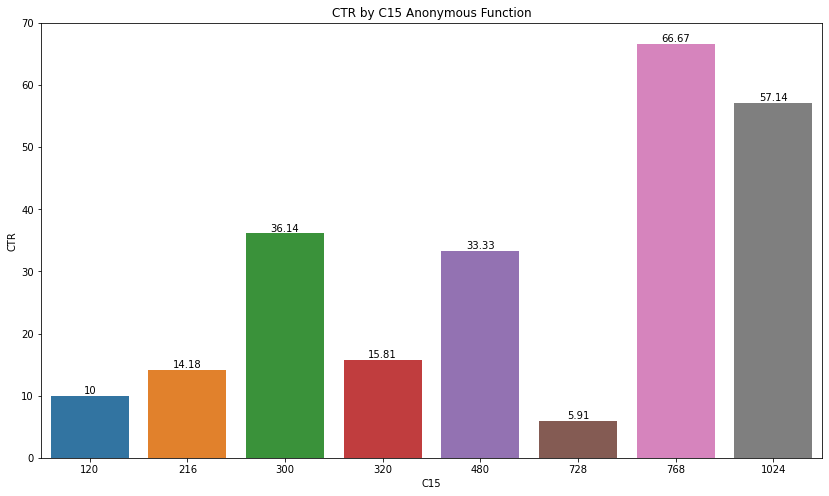

In [44]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_C15.C15,y = df_C15.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by C15 Anonymous Function')
plt.show()

<B>C16 Anonymous Function :

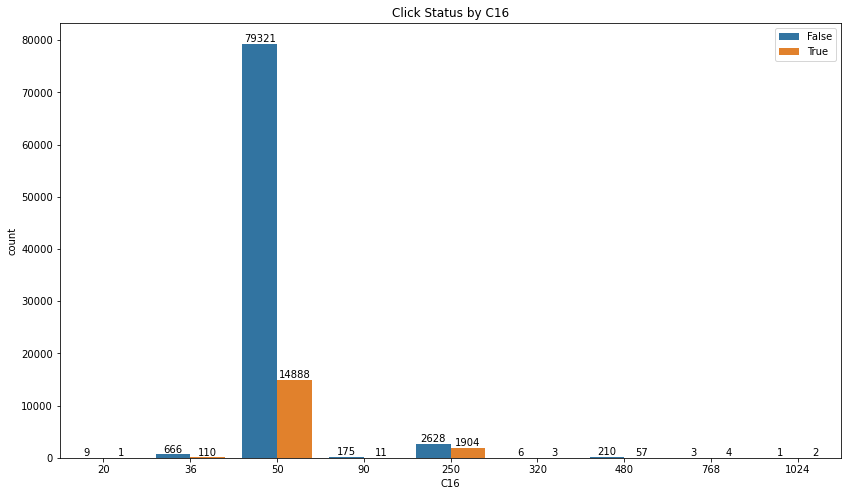

In [45]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.C16,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by C16')
plt.legend(loc='upper right')

plt.show()

In [46]:
df_C16 = df[['C16', 'click']].groupby('C16').count()
df_C16.columns = ['Impressions']
df_C16['Clicks'] = df_clicked_true[['C16', 'click']].groupby('C16').count()
df_C16['Clicks'] = df_C16['Clicks'].fillna(0)
df_C16['CTR'] = (df_C16['Clicks'] / df_C16['Impressions'] * 100).round(2)
df_C16 = df_C16.reset_index()

print(df_C16.sort_values('CTR',ascending=False))

    C16  Impressions  Clicks    CTR
8  1024            3       2  66.67
7   768            7       4  57.14
4   250         4532    1904  42.01
5   320            9       3  33.33
6   480          267      57  21.35
2    50        94209   14888  15.80
1    36          776     110  14.18
0    20           10       1  10.00
3    90          186      11   5.91


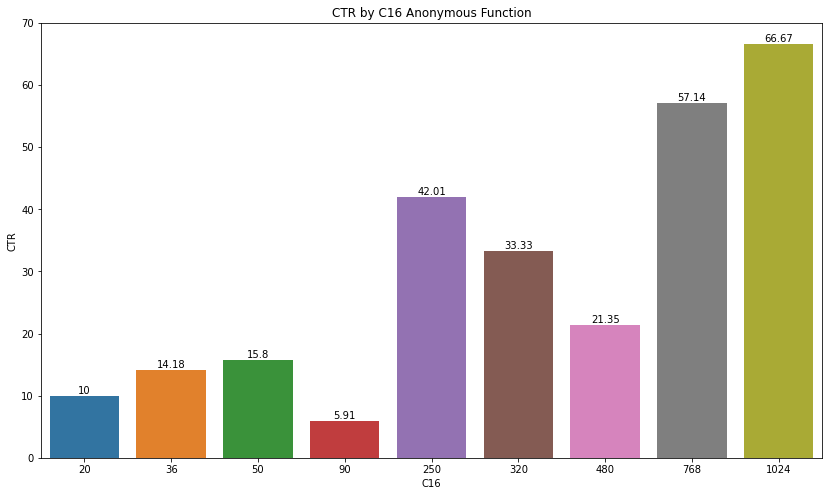

In [47]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_C16.C16,y = df_C16.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by C16 Anonymous Function')
plt.show()


<b><H3 style = "color : blue">6.Analysing Time Features(month,dayofweek,day,hour)</H3>

In [48]:
df[['month','dayofweek','day','hour']].nunique()

month         1
dayofweek     7
day          10
hour         24
dtype: int64

<b> since month have got only one value in it we can drop that field

In [49]:
#dropping Month Field
df = df.drop('month',axis = 1)

<B>Day of a Week:

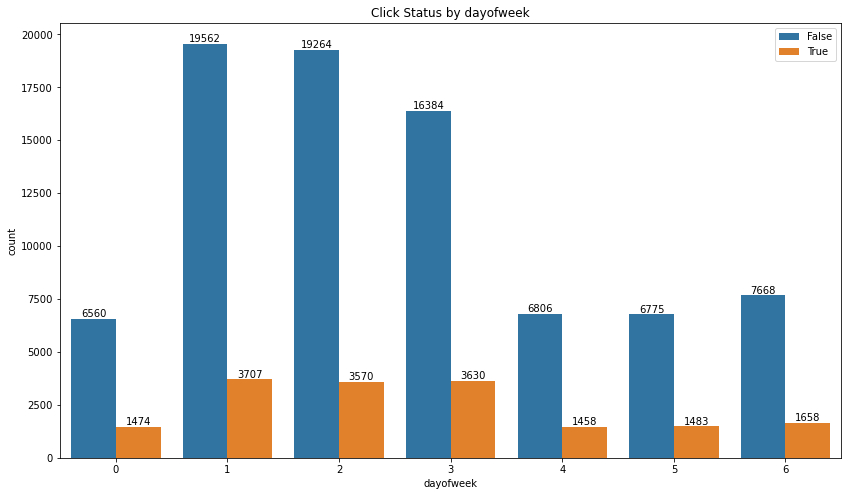

In [50]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.dayofweek,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by dayofweek')
plt.legend(loc='upper right')

plt.show()

In [51]:
df_dayofweek = df[['dayofweek', 'click']].groupby('dayofweek').count()
df_dayofweek.columns = ['Impressions']
df_dayofweek['Clicks'] = df_clicked_true[['dayofweek', 'click']].groupby('dayofweek').count()
df_dayofweek['Clicks'] = df_dayofweek['Clicks'].fillna(0)
df_dayofweek['CTR'] = (df_dayofweek['Clicks'] / df_dayofweek['Impressions'] * 100).round(2)
df_dayofweek = df_dayofweek.reset_index()

print(df_dayofweek.sort_values('CTR',ascending=False))

   dayofweek  Impressions  Clicks    CTR
0          0         8034    1474  18.35
3          3        20014    3630  18.14
5          5         8258    1483  17.96
6          6         9326    1658  17.78
4          4         8264    1458  17.64
1          1        23269    3707  15.93
2          2        22834    3570  15.63


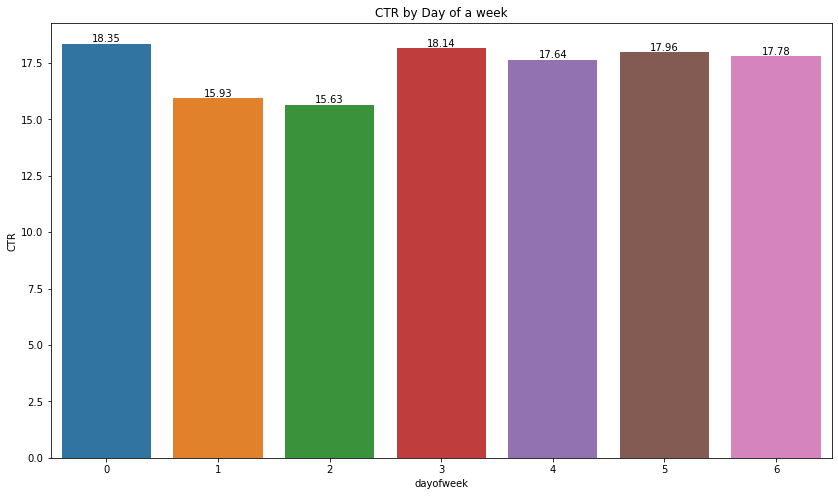

In [52]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_dayofweek.dayofweek,y = df_dayofweek.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by Day of a week')
plt.show()

<B>Day:

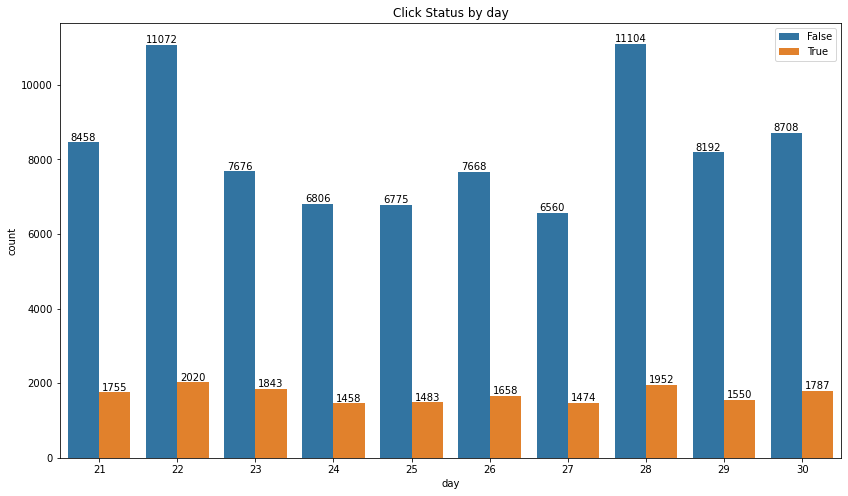

In [53]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.day,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by day')
plt.legend(loc='upper right')

plt.show()

In [54]:
df_day = df[['day', 'click']].groupby('day').count()
df_day.columns = ['Impressions']
df_day['Clicks'] = df_clicked_true[['day', 'click']].groupby('day').count()
df_day['Clicks'] = df_day['Clicks'].fillna(0)
df_day['CTR'] = (df_day['Clicks'] / df_day['Impressions'] * 100).round(2)
df_day = df_day.reset_index()

print(df_day.sort_values('CTR',ascending=False))

   day  Impressions  Clicks    CTR
2   23         9519    1843  19.36
6   27         8034    1474  18.35
4   25         8258    1483  17.96
5   26         9326    1658  17.78
3   24         8264    1458  17.64
0   21        10213    1755  17.18
9   30        10495    1787  17.03
8   29         9742    1550  15.91
1   22        13092    2020  15.43
7   28        13056    1952  14.95


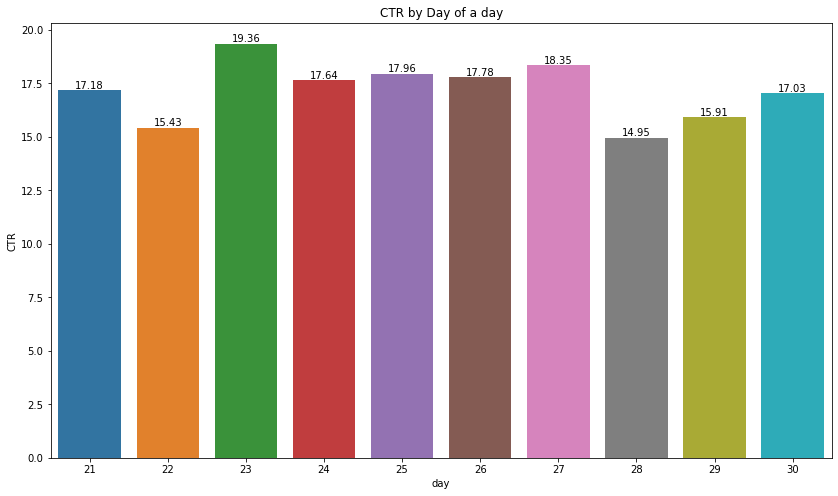

In [55]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_day.day,y = df_day.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by Day of a day')
plt.show()

<B>Hour:

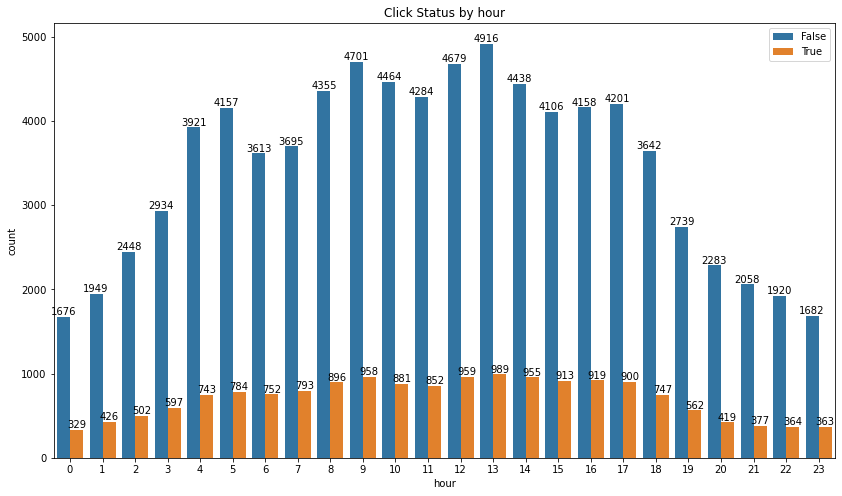

In [56]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x=df.hour,hue = df.click )
for i in ax.containers:
    ax.bar_label(i)

plt.title('Click Status by hour')
plt.legend(loc='upper right')

plt.show()

In [57]:
df_hour = df[['hour', 'click']].groupby('hour').count()
df_hour.columns = ['Impressions']
df_hour['Clicks'] = df_clicked_true[['hour', 'click']].groupby('hour').count()
df_hour['Clicks'] = df_hour['Clicks'].fillna(0)
df_hour['CTR'] = (df_hour['Clicks'] / df_hour['Impressions'] * 100).round(2)
df_hour = df_hour.reset_index()

print(df_hour.sort_values('CTR',ascending=False))

    hour  Impressions  Clicks    CTR
15    15         5019     913  18.19
16    16         5077     919  18.10
1      1         2375     426  17.94
23    23         2045     363  17.75
14    14         5393     955  17.71
7      7         4488     793  17.67
17    17         5101     900  17.64
6      6         4365     752  17.23
8      8         5251     896  17.06
19    19         3301     562  17.03
2      2         2950     502  17.02
18    18         4389     747  17.02
12    12         5638     959  17.01
9      9         5659     958  16.93
3      3         3531     597  16.91
13    13         5905     989  16.75
11    11         5136     852  16.59
10    10         5345     881  16.48
0      0         2005     329  16.41
22    22         2284     364  15.94
4      4         4664     743  15.93
5      5         4941     784  15.87
20    20         2702     419  15.51
21    21         2435     377  15.48


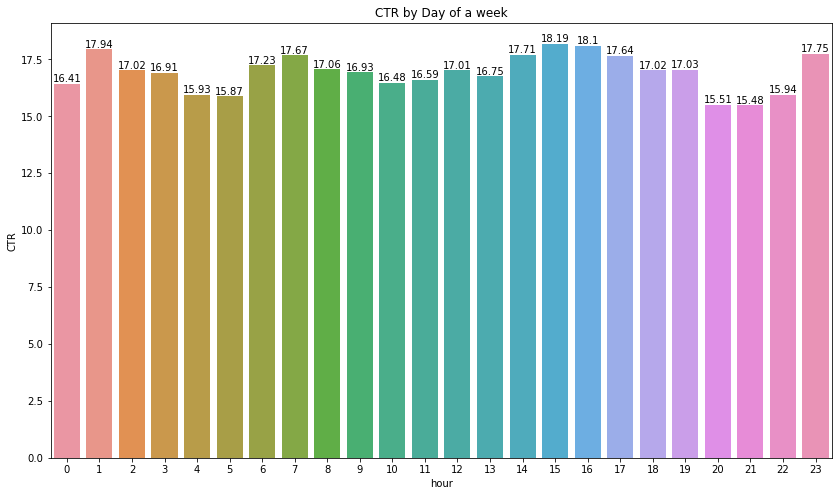

In [58]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=df_hour.hour,y = df_hour.CTR )
for i in ax.containers:
    ax.bar_label(i)

plt.title('CTR by Day of a week')
plt.show()

<H2 style = "color : brown"><b>Machine Learning Model Implementation</b><br></H3>

<b><H3 style = "color : blue">Creating a data for Model</H3>

In [59]:
df_data = df.copy()
df_data = df_data.drop(['click','y'],axis = 1)
df_data = df_data.astype('string')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   C1                99999 non-null  string
 1   banner_pos        99999 non-null  string
 2   site_domain       99999 non-null  string
 3   site_category     99999 non-null  string
 4   app_domain        99999 non-null  string
 5   app_category      99999 non-null  string
 6   device_model      99999 non-null  string
 7   device_type       99999 non-null  string
 8   device_conn_type  99999 non-null  string
 9   C14               99999 non-null  string
 10  C15               99999 non-null  string
 11  C16               99999 non-null  string
 12  C17               99999 non-null  string
 13  C18               99999 non-null  string
 14  C19               99999 non-null  string
 15  C20               99999 non-null  string
 16  C21               99999 non-null  string
 17  dayofweek   

<b><H3 style = "color : blue">Dummy Encoding or one Hot encoding :</H3>

In [60]:
start_time = time.time()

df_data = pd.get_dummies(df_data,columns= df_data.columns, drop_first=True)

dummy_time = ((time.time() - start_time) / 60)
print(round(dummy_time,2),' minute')

0.12  minute


In [61]:
len(df_data.columns)

7075

<b><H3 style = "color : blue">Model:</H3>

In [62]:
import time
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer

In [63]:
X = df_data
y = df['y']

In [64]:
# Train test split stratified on y value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42, stratify = y)

In [65]:
# Standardising the values by scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [66]:
X_train.head()

,C1_1002,C1_1005,C1_1007,C1_1008,C1_1010,C1_1012,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
53023,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16863,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88091,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75881,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61015,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
scaled_X_train

array([[-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       ...,
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994]])

In [68]:
scaled_X_test

array([[-0.24111813, -3.36250422, -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       ...,
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       [-0.24111813,  0.2973974 , -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994],
       [-0.24111813, -3.36250422, -0.03048685, ..., -0.21664069,
        -0.23647255, -0.24467994]])

In [69]:
classifiers = {
    "DummyClassifier_most_frequent": DummyClassifier(strategy='most_frequent', random_state=0),
    "LogisticRegression": LogisticRegression(solver = 'lbfgs', max_iter=1000),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    #'BaggingClassifier': BaggingClassifier(random_state=55),
    "RandomForestClassifier": RandomForestClassifier(),
}

In [70]:
# Running through a loop of classifiers and saving the scores 
df_models = pd.DataFrame(columns=['model','run_time', 'tp','tn','fp','fn','correct','incorrect',
                                    'accuracy', 'precision', 'recall','f1','roc_auc','avg_precision'])

i = 1
for key in classifiers:

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    y_probs = cross_val_predict(classifier, scaled_X_test, y_test, cv = 3, method = 'predict_proba')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    roc_auc = roc_auc_score(y_test, y_probs[:,1])
    avg_precision = average_precision_score(y_test, y_pred)
    
    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'tp':tp,
           'tn':tn,
           'fp':fp,
           'fn':fn,
           'correct': tp+tn,
           'incorrect': fp+fn,
           'accuracy': accuracy,
           'precision': precision,
           'recall': recall,
           'f1': round(f1,3),
            'roc_auc': round(roc_auc,3),
            'avg_precision': round(avg_precision,3),
    }
    print('Model',i,'.',key,':',format(round((time.time() - start_time)/60,2)),'min')
    i+=1
    print('_____________________________________________________')
    df_models = df_models.append(row, ignore_index=True)

Model 1 . DummyClassifier_most_frequent : 0.45 min
_____________________________________________________
Model 2 . LogisticRegression : 6.09 min
_____________________________________________________
Model 3 . DecisionTreeClassifier : 10.48 min
_____________________________________________________
Model 4 . RandomForestClassifier : 24.02 min
_____________________________________________________


In [71]:
df_models.sort_values('accuracy',ascending=False)

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
0,DummyClassifier_most_frequent,0.45,0,24906,0,5094,24906,5094,0.8302,0.0,0.0,0.0,0.5,0.17
1,LogisticRegression,6.09,529,24160,746,4565,24689,5311,0.822967,0.414902,0.103848,0.166,0.647,0.195
3,RandomForestClassifier,24.02,567,24117,789,4527,24684,5316,0.8228,0.418142,0.111307,0.176,0.684,0.197
2,DecisionTreeClassifier,10.48,1205,21984,2922,3889,23189,6811,0.772967,0.29198,0.236553,0.261,0.55,0.199


#### Dummy encoding of feature columns leads to high cardinality. It doesn't make sense to model with such complex number of columns due to poor interpretability and high computational time.
##### So its better to encode columns based on statistics as it will result in fewer columns and will be interpretable.

#### We will encode the columns based on the statistics provided in the following article - https://docs.microsoft.com/en-us/archive/blogs/machinelearning/big-learning-made-easy-with-counts

<H2 style = "color : brown"><b>Feature Engineering</b><br></H3>

In [72]:
df_prepared = pd.DataFrame()

<b>Feature Engineering done by creating ratio of Clicked vs Non Clicked and Quantiles:
1. Impression are total click per category
2. CTR is the ratio of Clicked over total impression.
3. Non Click ratio is Non Clicked over total impression.
4. we find odd ratio such as CTR / Non Click Ration
5. Quantile category 3 has above 75% of the CTR values
6. Quantile category 2 has above 50% of the CTR values
7. Quantile category 1 has above 25% of the CTR values
8. Quantile category 0 has less than 25% of the CTR values

In [73]:
# Encoding categorical columns by clicks, impressions and CTR
def click_counting(x, bin_column):
    clicked = pd.Series(x[x['y'] > 0][bin_column].value_counts(), name = 'clicked')
    no_clicks = pd.Series(x[x['y'] < 1][bin_column].value_counts(), name = 'no_clicks')
    counts = pd.DataFrame([clicked, no_clicks]).T.fillna('0')
    counts['clicked'] = counts['clicked'].astype('int64')
    counts['impressions'] = counts['clicked'].astype('int64') + counts['no_clicks'].astype('int64')
    return counts

In [74]:
# Bin counting based on CTR, non-clicks probaility, odds ratio and quantiles
def bin_counting(counts):
    counts['CTR'] = counts['clicked'].astype('int64').divide(counts['impressions'].astype('int64')) * 100
    counts['N-'] = counts['no_clicks'].astype('int64').divide(counts['impressions'].astype('int64')) * 100
    
    # Odds = p/(1-p)
    # odds = CTR/(Non-clicks ratio)
    counts['odds'] = counts['CTR'].divide(counts['N-'])
    
    # To avoid division by zero, when non-clicks probability is zero. We add 0.001 regularisation.
    counts['odds'] = counts['odds'].replace(np.inf, 999)
    counts['CTR'] = counts['CTR'].replace(100, 100.001)
    counts['N-'] = counts['N-'].replace(0, 0.001)
    counts['odds'] = np.round(counts['odds'], 4)
    
    #Feature engineering by binning into quanitles
    qntl_3 = np.percentile(counts['odds'], 75)
    qntl_2 = np.percentile(counts['odds'], 50)
    qntl_1 = np.percentile(counts['odds'], 25)
    counts['quantile'] = counts['odds'].apply(lambda x: 3 if x >= qntl_3 else (2 if (x < qntl_3 and x >= qntl_2) else (1 if (x < qntl_2 and x >= qntl_1) else 0)))
    bin_counts = counts.filter(items = ['odds', 'quantile'])
    return counts, bin_counts
 

In [75]:
# Testing for a particular feature, the encoded values produced per category
bin_column = 'app_category'
app_clicks =click_counting(df.filter(items = [bin_column, 'y']), bin_column)
app_all, app_bin_counts = bin_counting(app_clicks)
app_all.sort_values('CTR').head(20)

,clicked,no_clicks,impressions,CTR,N-,odds,quantile
79f0b860,0,1.0,1,0.000000,100.000000,0.0000,0
7113d72a,0,2.0,2,0.000000,100.000000,0.0000,0
2281a340,0,6.0,6,0.000000,100.000000,0.0000,0
a7fd01ec,0,1.0,1,0.000000,100.000000,0.0000,0
fc6fa53d,2,56.0,58,3.448276,96.551724,0.0357,0
879c24eb,1,21.0,22,4.545455,95.454545,0.0476,1
a3c42688,2,30.0,32,6.250000,93.750000,0.0667,1
75d80bbe,7,74.0,81,8.641975,91.358025,0.0946,1
8ded1f7a,336,3183.0,3519,9.548167,90.451833,0.1056,1
cef3e649,422,3878.0,4300,9.813953,90.186047,0.1088,1


In [76]:
cat_columns = ['C1', 'banner_pos', 'site_domain', 'site_category',
       'app_domain', 'app_category',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'dayofweek', 'hour', 'day',
       'C17', 'C18', 'C19', 'C20', 'C21']

In [77]:

# Mapping each column value to its encoded value
for category in cat_columns:
    bin_column = category
    bin_clicks = click_counting(df.filter(items = [bin_column, 'y']), bin_column)
    bin_all, bin_counts = bin_counting(bin_clicks)
    category_columns = [category + '_odds', category + '_quantile']
    df_cat = pd.DataFrame(data = bin_all[['odds', 'quantile']])
    df_cat.columns = category_columns
    
    for k in df_cat.to_dict():
        df_prepared[k] = df[category].map(df_cat[k])

In [78]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   C1_odds                    99999 non-null  float64
 1   C1_quantile                99999 non-null  int64  
 2   banner_pos_odds            99999 non-null  float64
 3   banner_pos_quantile        99999 non-null  int64  
 4   site_domain_odds           99999 non-null  float64
 5   site_domain_quantile       99999 non-null  int64  
 6   site_category_odds         99999 non-null  float64
 7   site_category_quantile     99999 non-null  int64  
 8   app_domain_odds            99999 non-null  float64
 9   app_domain_quantile        99999 non-null  int64  
 10  app_category_odds          99999 non-null  float64
 11  app_category_quantile      99999 non-null  int64  
 12  device_model_odds          99999 non-null  float64
 13  device_model_quantile      99999 non-null  int

In [79]:
df_prepared.head().T

,0,1,2,3,4
C1_odds,0.2028,0.2028,0.2028,0.2813,0.2028
C1_quantile,2.0000,2.0000,2.0000,3.0000,2.0000
banner_pos_odds,0.2208,0.2208,0.1980,0.1980,0.1980
banner_pos_quantile,2.0000,2.0000,1.0000,1.0000,1.0000
site_domain_odds,0.0352,0.3492,0.0361,0.0000,0.2545
site_domain_quantile,2.0000,3.0000,2.0000,2.0000,2.0000
site_category_odds,0.2146,0.2146,0.2594,0.1510,0.2594
site_category_quantile,3.0000,3.0000,3.0000,2.0000,3.0000
app_domain_odds,0.2408,0.2408,0.2408,0.2408,0.2408
app_domain_quantile,3.0000,3.0000,3.0000,3.0000,3.0000


In [80]:
df_prepared.isnull().sum()

C1_odds                      0
C1_quantile                  0
banner_pos_odds              0
banner_pos_quantile          0
site_domain_odds             0
site_domain_quantile         0
site_category_odds           0
site_category_quantile       0
app_domain_odds              0
app_domain_quantile          0
app_category_odds            0
app_category_quantile        0
device_model_odds            0
device_model_quantile        0
device_type_odds             0
device_type_quantile         0
device_conn_type_odds        0
device_conn_type_quantile    0
C14_odds                     0
C14_quantile                 0
C15_odds                     0
C15_quantile                 0
C16_odds                     0
C16_quantile                 0
dayofweek_odds               0
dayofweek_quantile           0
hour_odds                    0
hour_quantile                0
day_odds                     0
day_quantile                 0
C17_odds                     0
C17_quantile                 0
C18_odds

<b><H3 style = "color : blue">Machine Learning Model using prepared data after feature Engineering    :</H3>

In [81]:
X = df_prepared
y = df['y']

In [82]:
#Create Train Test Data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify=y)

In [83]:
# Standardising the values by scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [84]:
classifiers = {
    "DummyClassifier_most_frequent": DummyClassifier(strategy='most_frequent', random_state=0),
    "LogisticRegression": LogisticRegression(solver = 'lbfgs', max_iter=1000),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "BaggingClassifier": BaggingClassifier(random_state=55),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
}

In [85]:
# Running through a loop of classifiers and saving the scores 
df_result_log = pd.DataFrame(columns=['model','run_time', 'tp','tn','fp','fn','correct','incorrect',
                                    'accuracy', 'precision', 'recall','f1','roc_auc','avg_precision'])

i = 1
for key in classifiers:

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    y_probs = cross_val_predict(classifier, scaled_X_test, y_test, cv = 3, method = 'predict_proba')    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs[:,1])
    avg_precision = average_precision_score(y_test, y_pred)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'tp':tp,
           'tn':tn,
           'fp':fp,
           'fn':fn,
           'correct': tp+tn,
           'incorrect': fp+fn,
           'accuracy': accuracy,
           'precision': precision,
           'recall': recall,
           'f1': round(f1,3),
            'roc_auc': round(roc_auc,3),
            'avg_precision': round(avg_precision,3),
    }
    print('Model',i,'.',key,':',format(round((time.time() - start_time)/60,2)),'min')
    i+=1
    print('_____________________________________________________')
    df_result_log = df_result_log.append(row, ignore_index=True)
        


Model 1 . DummyClassifier_most_frequent : 0.0 min
_____________________________________________________
Model 2 . LogisticRegression : 0.11 min
_____________________________________________________
Model 3 . DecisionTreeClassifier : 0.05 min
_____________________________________________________
Model 4 . BaggingClassifier : 0.36 min
_____________________________________________________
Model 5 . RandomForestClassifier : 0.75 min
_____________________________________________________
Model 6 . AdaBoostClassifier : 0.3 min
_____________________________________________________
Model 7 . GradientBoostingClassifier : 0.97 min
_____________________________________________________


In [86]:
df_result_log.sort_values('accuracy',ascending=False)

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
6,GradientBoostingClassifier,0.97,680,24568,338,4414,25248,4752,0.8416,0.667976,0.13349,0.223,0.772,0.236
5,AdaBoostClassifier,0.3,622,24570,336,4472,25192,4808,0.839733,0.649269,0.122104,0.206,0.765,0.228
1,LogisticRegression,0.11,415,24630,276,4679,25045,4955,0.834833,0.600579,0.081468,0.143,0.74,0.205
0,DummyClassifier_most_frequent,0.0,0,24906,0,5094,24906,5094,0.8302,0.0,0.0,0.0,0.5,0.17
4,RandomForestClassifier,0.75,1002,23582,1324,4092,24584,5416,0.819467,0.430782,0.196702,0.27,0.715,0.221
3,BaggingClassifier,0.36,978,23382,1524,4116,24360,5640,0.812,0.390887,0.191991,0.258,0.691,0.212
2,DecisionTreeClassifier,0.05,1545,21222,3684,3549,22767,7233,0.7589,0.295468,0.303298,0.299,0.574,0.208


<b><H3 style = "color : blue">Hyper Tuned Logistic Regression:</H3>

In [87]:
# Hyperparameters tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
log_model = LogisticRegression()
grid_model = GridSearchCV(log_model, param_grid, scoring = 'roc_auc')

In [88]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [89]:
grid_model.best_params_

{'C': 100, 'penalty': 'l2'}

In [90]:
# Classifier with tuned hyper parameters
start_time = time.time()

classifier = LogisticRegression(C = 100, penalty = 'l2', random_state= 42)
model = classifier.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_probs = cross_val_predict(classifier, scaled_X_test, y_test, cv = 3, method = 'predict_proba')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_probs[:,1])
avg_precision = average_precision_score(y_test, y_pred)

row = {'model': 'Logistic Regression with Hypertunning',
       'run_time': format(round((time.time() - start_time)/60,2)),
       'tp':tp,
       'tn':tn,
       'fp':fp,
       'fn':fn,
       'correct': tp+tn,
       'incorrect': fp+fn,
       'accuracy': accuracy,
       'precision': precision,
       'recall': recall,
       'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_precision': round(avg_precision,3),
        }

df_result_log = df_result_log.append(row, ignore_index=True)

In [91]:
df_result_log.sort_values('accuracy', ascending = False)

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
6,GradientBoostingClassifier,0.97,680,24568,338,4414,25248,4752,0.8416,0.667976,0.13349,0.223,0.772,0.236
5,AdaBoostClassifier,0.3,622,24570,336,4472,25192,4808,0.839733,0.649269,0.122104,0.206,0.765,0.228
7,Logistic Regression with Hypertunning,0.04,452,24598,308,4642,25050,4950,0.835,0.594737,0.088732,0.154,0.741,0.208
1,LogisticRegression,0.11,415,24630,276,4679,25045,4955,0.834833,0.600579,0.081468,0.143,0.74,0.205
0,DummyClassifier_most_frequent,0.0,0,24906,0,5094,24906,5094,0.8302,0.0,0.0,0.0,0.5,0.17
4,RandomForestClassifier,0.75,1002,23582,1324,4092,24584,5416,0.819467,0.430782,0.196702,0.27,0.715,0.221
3,BaggingClassifier,0.36,978,23382,1524,4116,24360,5640,0.812,0.390887,0.191991,0.258,0.691,0.212
2,DecisionTreeClassifier,0.05,1545,21222,3684,3549,22767,7233,0.7589,0.295468,0.303298,0.299,0.574,0.208


In [92]:
df_result_log.loc[[1,7],:]

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
1,LogisticRegression,0.11,415,24630,276,4679,25045,4955,0.834833,0.600579,0.081468,0.143,0.74,0.205
7,Logistic Regression with Hypertunning,0.04,452,24598,308,4642,25050,4950,0.835,0.594737,0.088732,0.154,0.741,0.208


In [93]:
# User defined Function to plot Report classification report and confusion matrix for each model
def report_model(model):
    model_preds = model.predict(scaled_X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plot_confusion_matrix(model, scaled_X_test, y_test);

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.59      0.09      0.15      5094

    accuracy                           0.83     30000
   macro avg       0.72      0.54      0.53     30000
weighted avg       0.80      0.83      0.78     30000





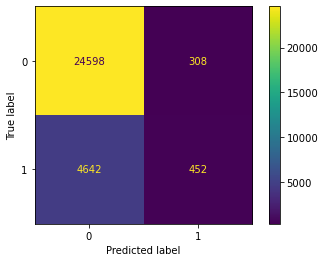

In [94]:
report_model(classifier)

In [95]:
# User defined Function Report precision-recall curve and ROC curve for each model
def plot_model_curves(model):
    fig, axes = plt.subplots(nrows = 2, figsize = (12, 8))
    plot_precision_recall_curve(model, scaled_X_test, y_test, ax = axes[0])
    axes[0].set_title('Precision Recall Curve')
    
    plot_roc_curve(model, scaled_X_test,  y_test, ax = axes[1])
    axes[1].set_title('Roc curve')
    fig.subplots_adjust(hspace = 0.5) 
    print("Auc-Roc: {}".format(roc_auc))

Auc-Roc: 0.7409533225374995


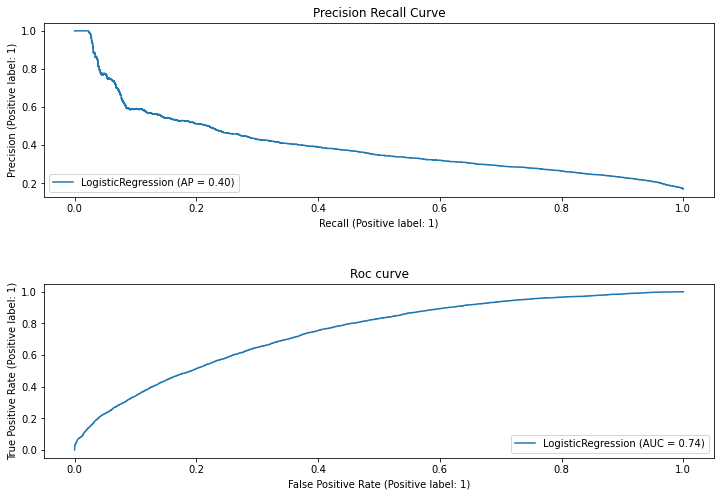

In [96]:
plot_model_curves(classifier)

In [97]:
# Report feature wise importance for each model
def report_importance(model, data):
    feats = pd.DataFrame(data = data, index = X.columns, columns = ['Importance'])
    imp_feats = feats[feats['Importance'] > 0]
    print(imp_feats.sort_values('Importance', ascending = False))
    print('\n')
    
    plt.figure(figsize=(6,2),dpi=100)
    sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
    plt.title('Feature wise importance')
    plt.xlabel('Features')
    plt.xticks(rotation=90);

                           Importance
site_domain_odds             6.672343
C17_odds                     5.989101
C14_odds                     5.461840
device_model_odds            5.311067
app_domain_odds              2.090464
device_model_quantile        0.358584
C14_quantile                 0.319457
device_conn_type_quantile    0.256935
site_domain_quantile         0.230818
C15_quantile                 0.183981
C1_odds                      0.174480
banner_pos_odds              0.124195
C18_quantile                 0.090722
app_domain_quantile          0.089079
app_category_odds            0.068259
hour_odds                    0.061972
site_category_odds           0.059035
C17_quantile                 0.052959
C20_odds                     0.049000
day_odds                     0.045570
device_type_quantile         0.036315
C20_quantile                 0.023025
C16_odds                     0.022533
app_category_quantile        0.014875
day_quantile                 0.010793
C19_quantile

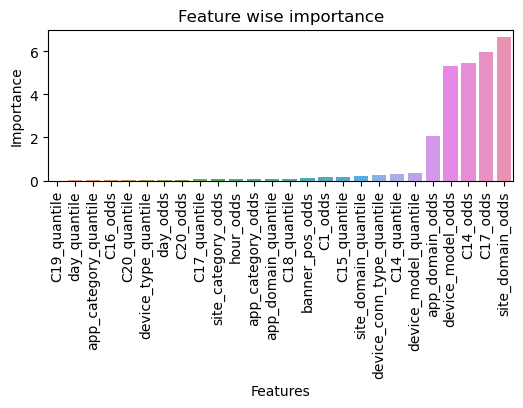

In [98]:
report_importance(classifier,classifier.coef_[0])

<b> based on feature coeficient we select important feature as site domain, C17, C14 and device model Odds.

<b><H3 style = "color : blue">Adaboost classifier<H3>

In [99]:
df_result_ada = pd.DataFrame(columns=['model','run_time', 'tp','tn','fp','fn','correct','incorrect',
                                    'accuracy', 'precision', 'recall','f1','roc_auc','avg_precision'])

start_time = time.time()

classifier = AdaBoostClassifier(random_state= 42)
model = classifier.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_probs = cross_val_predict(classifier, scaled_X_test, y_test, cv = 3, method = 'predict_proba')

# Calculating different metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_probs[:,1])
avg_precision = average_precision_score(y_test, y_pred)

row = {'model': 'AdaBoost Classifier',
       'run_time': format(round((time.time() - start_time)/60,2)),
       'tp':tp,
       'tn':tn,
       'fp':fp,
       'fn':fn,
       'correct': tp+tn,
       'incorrect': fp+fn,
       'accuracy': accuracy,
       'precision': precision,
       'recall': recall,
       'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_precision': round(avg_precision,3),
}

df_result_ada = df_result_ada.append(row, ignore_index=True)
df_result_ada.head()

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
0,AdaBoost Classifier,0.3,622,24570,336,4472,25192,4808,0.839733,0.649269,0.122104,0.206,0.765,0.228


              precision    recall  f1-score   support

           0       0.85      0.99      0.91     24906
           1       0.65      0.12      0.21      5094

    accuracy                           0.84     30000
   macro avg       0.75      0.55      0.56     30000
weighted avg       0.81      0.84      0.79     30000





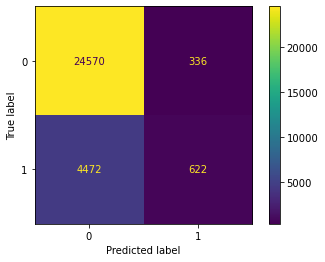

In [100]:
report_model(classifier)

Auc-Roc: 0.7652748184764822


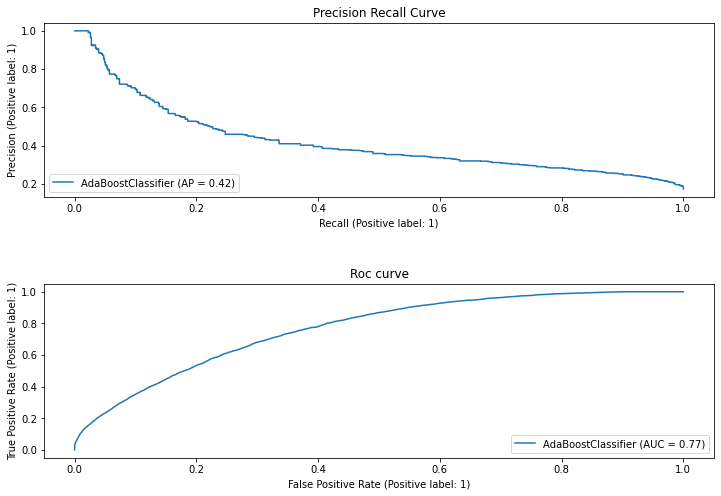

In [101]:
plot_model_curves(classifier)

In [102]:
# Hyperparameter tuning
param_grid = {'learning_rate':[0.01, 0.1, 1, 10, 100]}
ada_model = AdaBoostClassifier()
grid_model = GridSearchCV(ada_model, param_grid)

In [103]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100]})

In [104]:
grid_model.best_params_

{'learning_rate': 1}

In [105]:
error_rates = []

for n in range(1,49):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(scaled_X_train,y_train)
    preds = model.predict(scaled_X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

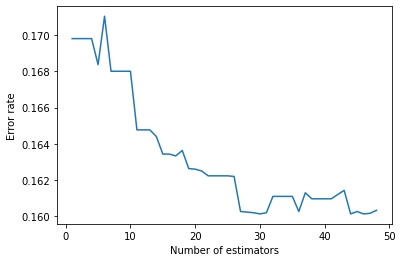

In [106]:
plt.plot(range(1,49),error_rates)
plt.xlabel("Number of estimators")
plt.ylabel("Error rate");

In [107]:
np.argmin(error_rates)

29

In [108]:
# Classifier with tuned hyper parameters
start_time = time.time()

classifier = AdaBoostClassifier(n_estimators = 28, learning_rate= 1, random_state= 42)
model = classifier.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_probs = cross_val_predict(classifier, scaled_X_test, y_test, cv = 3, method = 'predict_proba')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_probs[:,1])
avg_precision = average_precision_score(y_test, y_pred)

row = {'model': 'AdaBoost Classifier with tuned hyperparameters',
       'run_time': format(round((time.time() - start_time)/60,2)),
       'tp':tp,
       'tn':tn,
       'fp':fp,
       'fn':fn,
       'correct': tp+tn,
       'incorrect': fp+fn,
       'accuracy': accuracy,
       'precision': precision,
       'recall': recall,
       'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_precision': round(avg_precision,3),
}
df_result_ada = df_result_ada.append(row, ignore_index=True)
df_result_ada.head()

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
0,AdaBoost Classifier,0.3,622,24570,336,4472,25192,4808,0.839733,0.649269,0.122104,0.206,0.765,0.228
1,AdaBoost Classifier with tuned hyperparameters,0.16,645,24548,358,4449,25193,4807,0.839767,0.643071,0.12662,0.212,0.762,0.23


              precision    recall  f1-score   support

           0       0.85      0.99      0.91     24906
           1       0.64      0.13      0.21      5094

    accuracy                           0.84     30000
   macro avg       0.74      0.56      0.56     30000
weighted avg       0.81      0.84      0.79     30000





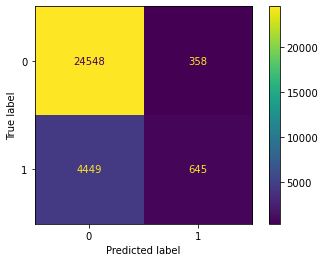

In [109]:
report_model(classifier)

Auc-Roc: 0.7619340120502087


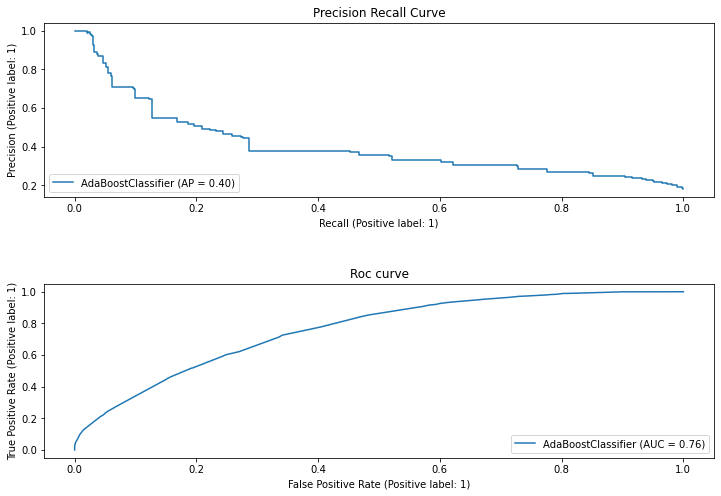

In [110]:
plot_model_curves(classifier)

In [111]:
classifier

AdaBoostClassifier(learning_rate=1, n_estimators=28, random_state=42)

In [112]:
classifier

AdaBoostClassifier(learning_rate=1, n_estimators=28, random_state=42)

                       Importance
device_model_odds        0.321429
site_domain_odds         0.285714
C14_odds                 0.250000
app_domain_odds          0.071429
app_category_odds        0.035714
app_category_quantile    0.035714




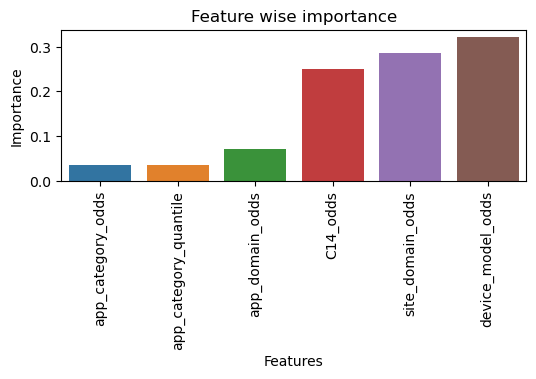

In [113]:
# Feature selection
report_importance(classifier, classifier.feature_importances_)

<b> based on Feature Coefficient, we can select important feature as device model(odd), site domain(odd), C14(odd), app domain(odd) and app category(odd)

<b><H3 style = "color : blue">Gradient Boosting classifier</H3>

In [114]:
df_result_gradient = pd.DataFrame(columns=['model','run_time', 'tp','tn','fp','fn','correct','incorrect',
                                    'accuracy', 'precision', 'recall','f1','roc_auc','avg_precision'])

start_time = time.time()


classifier = GradientBoostingClassifier(random_state= 42)
model = classifier.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_probs = cross_val_predict(classifier, scaled_X_test, y_test, cv = 3, method = 'predict_proba')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_probs[:,1])
avg_precision = average_precision_score(y_test, y_pred)

row = {'model': 'Gradient Boosting Classifier',
       'run_time': format(round((time.time() - start_time)/60,2)),
       'tp':tp,
       'tn':tn,
       'fp':fp,
       'fn':fn,
       'correct': tp+tn,
       'incorrect': fp+fn,
       'accuracy': accuracy,
       'precision': precision,
       'recall': recall,
       'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_precision': round(avg_precision,3),
}

df_result_gradient = df_result_gradient.append(row, ignore_index=True)
df_result_gradient.head()

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
0,Gradient Boosting Classifier,0.93,680,24568,338,4414,25248,4752,0.8416,0.667976,0.13349,0.223,0.772,0.236


              precision    recall  f1-score   support

           0       0.85      0.99      0.91     24906
           1       0.67      0.13      0.22      5094

    accuracy                           0.84     30000
   macro avg       0.76      0.56      0.57     30000
weighted avg       0.82      0.84      0.79     30000





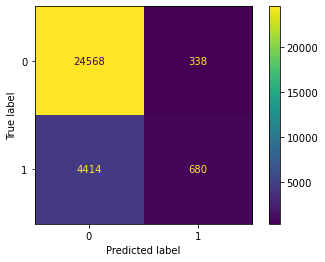

In [115]:
report_model(classifier)

Auc-Roc: 0.7721379422356368


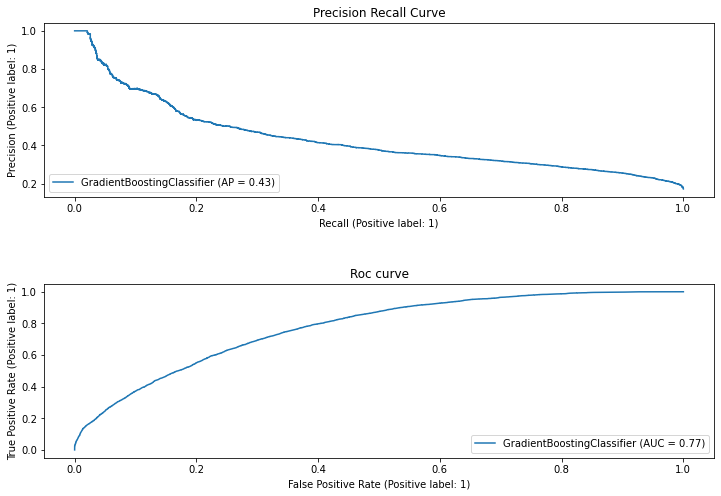

In [116]:
plot_model_curves(classifier)

In [117]:
# Hyperparameter tuning
param_grid = {
    "learning_rate":[0.01, 0.1, 1, 10, 100]
}
gbm_model = GradientBoostingClassifier()
grid_model = GridSearchCV(gbm_model, param_grid)

In [118]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100]})

In [119]:
grid_model.best_params_

{'learning_rate': 0.1}

In [120]:
# Classifier with tuned hyper parameters

start_time = time.time()

classifier = GradientBoostingClassifier(n_estimators = 28, learning_rate= 0.1, random_state= 42)
model = classifier.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_probs = cross_val_predict(classifier, scaled_X_test, y_test, cv = 3, method = 'predict_proba')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_probs[:,1])
avg_precision = average_precision_score(y_test, y_pred)

row = {'model': 'Gradient boosting classifier with tuned hyperparameters',
       'run_time': format(round((time.time() - start_time)/60,2)),
       'tp':tp,
       'tn':tn,
       'fp':fp,
       'fn':fn,
       'correct': tp+tn,
       'incorrect': fp+fn,
       'accuracy': accuracy,
       'precision': precision,
       'recall': recall,
       'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_precision': round(avg_precision,3),
}

df_result_gradient = df_result_gradient.append(row, ignore_index=True)
df_result_gradient.head()

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
0,Gradient Boosting Classifier,0.93,680,24568,338,4414,25248,4752,0.8416,0.667976,0.13349,0.223,0.772,0.236
1,Gradient boosting classifier with tuned hyperp...,0.28,479,24696,210,4615,25175,4825,0.839167,0.69521,0.094032,0.166,0.766,0.219


              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.70      0.09      0.17      5094

    accuracy                           0.84     30000
   macro avg       0.77      0.54      0.54     30000
weighted avg       0.82      0.84      0.78     30000





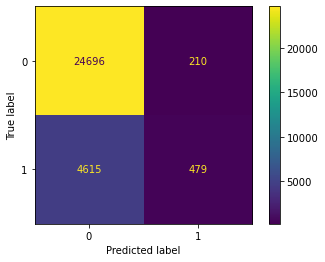

In [121]:
report_model(classifier)

Auc-Roc: 0.7664716113111408


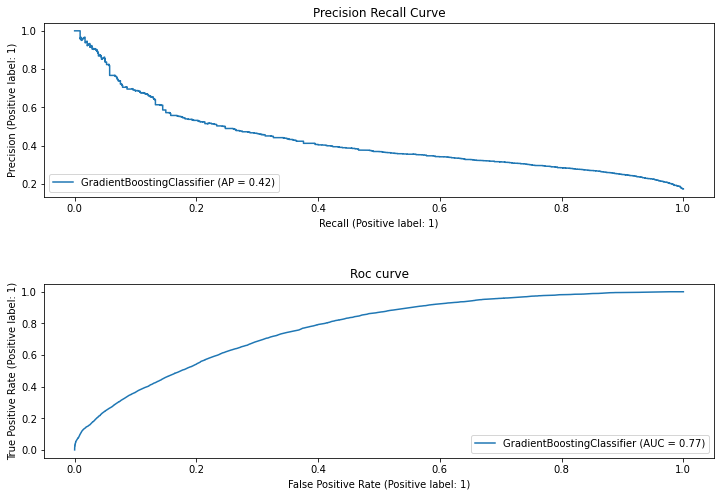

In [122]:
plot_model_curves(classifier)

                   Importance
C14_odds             0.453599
site_domain_odds     0.269069
device_model_odds    0.264014
app_domain_odds      0.007784
app_category_odds    0.003795
C21_odds             0.001086
C18_quantile         0.000487
day_odds             0.000167




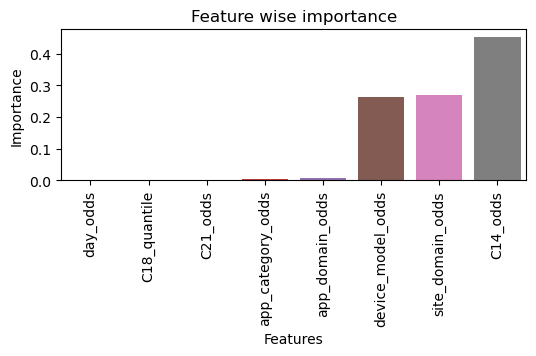

In [123]:
# Feature selection
report_importance(classifier, classifier.feature_importances_)

#### Based on feature coefficient, we can select the important features with positive coefficient - c14, site_domain, device_model

In [124]:
df_result = pd.DataFrame()
df_result = pd.concat([df_result_log, df_result_ada, df_result_gradient], ignore_index = True)
df_result.sort_values('roc_auc', ascending = False)

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
6,GradientBoostingClassifier,0.97,680,24568,338,4414,25248,4752,0.8416,0.667976,0.13349,0.223,0.772,0.236
10,Gradient Boosting Classifier,0.93,680,24568,338,4414,25248,4752,0.8416,0.667976,0.13349,0.223,0.772,0.236
11,Gradient boosting classifier with tuned hyperp...,0.28,479,24696,210,4615,25175,4825,0.839167,0.69521,0.094032,0.166,0.766,0.219
5,AdaBoostClassifier,0.3,622,24570,336,4472,25192,4808,0.839733,0.649269,0.122104,0.206,0.765,0.228
8,AdaBoost Classifier,0.3,622,24570,336,4472,25192,4808,0.839733,0.649269,0.122104,0.206,0.765,0.228
9,AdaBoost Classifier with tuned hyperparameters,0.16,645,24548,358,4449,25193,4807,0.839767,0.643071,0.12662,0.212,0.762,0.23
7,Logistic Regression with Hypertunning,0.04,452,24598,308,4642,25050,4950,0.835,0.594737,0.088732,0.154,0.741,0.208
1,LogisticRegression,0.11,415,24630,276,4679,25045,4955,0.834833,0.600579,0.081468,0.143,0.74,0.205
4,RandomForestClassifier,0.75,1002,23582,1324,4092,24584,5416,0.819467,0.430782,0.196702,0.27,0.715,0.221
3,BaggingClassifier,0.36,978,23382,1524,4116,24360,5640,0.812,0.390887,0.191991,0.258,0.691,0.212


<b> we are selecting Gradient Boost Classifier algorithm for following reason :
1. Gives highest ROC-Accuracy score(Area under curve of ROC curve works as a good measure of model performance).
2. Good Accuracy Score : 84.16%.
3. Best Correct prediction : 25248 correct
4. Average Precision score is also best.
    

In [136]:
df_result.loc[[0,1,2,3,4,5,6,7,9,11],:].sort_values('roc_auc', ascending = False)
#df_result_log.loc[[1,7],:]

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
6,GradientBoostingClassifier,0.97,680,24568,338,4414,25248,4752,0.8416,0.667976,0.13349,0.223,0.772,0.236
11,Gradient boosting classifier with tuned hyperp...,0.28,479,24696,210,4615,25175,4825,0.839167,0.69521,0.094032,0.166,0.766,0.219
5,AdaBoostClassifier,0.3,622,24570,336,4472,25192,4808,0.839733,0.649269,0.122104,0.206,0.765,0.228
9,AdaBoost Classifier with tuned hyperparameters,0.16,645,24548,358,4449,25193,4807,0.839767,0.643071,0.12662,0.212,0.762,0.23
7,Logistic Regression with Hypertunning,0.04,452,24598,308,4642,25050,4950,0.835,0.594737,0.088732,0.154,0.741,0.208
1,LogisticRegression,0.11,415,24630,276,4679,25045,4955,0.834833,0.600579,0.081468,0.143,0.74,0.205
4,RandomForestClassifier,0.75,1002,23582,1324,4092,24584,5416,0.819467,0.430782,0.196702,0.27,0.715,0.221
3,BaggingClassifier,0.36,978,23382,1524,4116,24360,5640,0.812,0.390887,0.191991,0.258,0.691,0.212
2,DecisionTreeClassifier,0.05,1545,21222,3684,3549,22767,7233,0.7589,0.295468,0.303298,0.299,0.574,0.208
0,DummyClassifier_most_frequent,0.0,0,24906,0,5094,24906,5094,0.8302,0.0,0.0,0.0,0.5,0.17


<b><H3 style = "color : blue">Final Model</H3>

In [125]:
X = df_prepared
y = df['y']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [126]:
final_model = GradientBoostingClassifier(random_state= 42)

In [127]:
final_model.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [128]:
df_result_final = pd.DataFrame(columns=['model','run_time', 'tp','tn','fp','fn','correct','incorrect',
                                    'accuracy', 'precision', 'recall','f1','roc_auc','avg_precision'])

start_time = time.time()

y_pred = final_model.predict(X)
y_probs = cross_val_predict(classifier, X, y, cv = 3, method = 'predict_proba')

# Calculate different performance metrics
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

roc_auc = roc_auc_score(y, y_probs[:,1])
avg_precision = average_precision_score(y, y_pred)

row = {'model': key,
       'run_time': format(round((time.time() - start_time)/60,2)),
       'tp':tp,
       'tn':tn,
       'fp':fp,
       'fn':fn,
       'correct': tp+tn,
       'incorrect': fp+fn,
       'accuracy': accuracy,
       'precision': precision,
       'recall': recall,
       'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_precision': round(avg_precision,3),
}

df_result_final = df_result_final.append(row, ignore_index=True)
df_result_final.head()

,model,run_time,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_precision
0,GradientBoostingClassifier,0.55,2224,81936,1083,14756,84160,15839,0.841608,0.672513,0.130978,0.219,0.766,0.236


              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24906
           1       0.70      0.11      0.19      5094

    accuracy                           0.84     30000
   macro avg       0.77      0.55      0.55     30000
weighted avg       0.82      0.84      0.79     30000





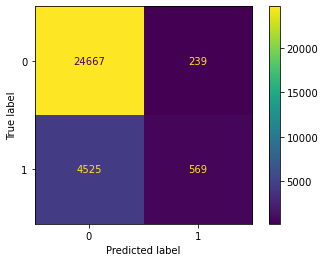

In [129]:
report_model(final_model)

Auc-Roc: 0.7660610958812258


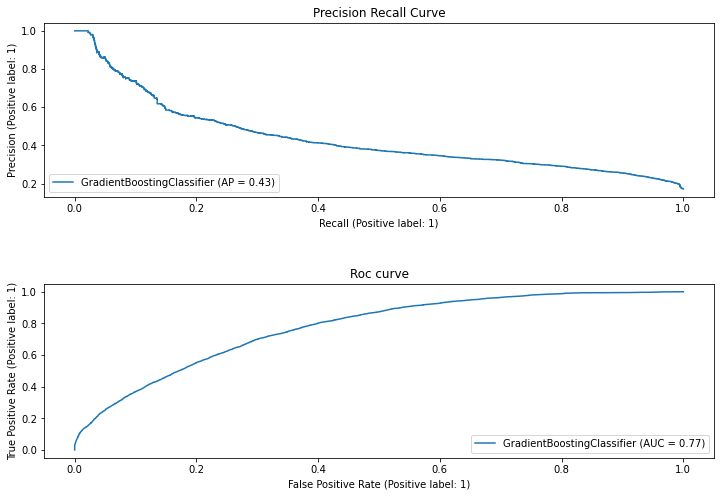

In [130]:
plot_model_curves(final_model)

                           Importance
C14_odds                     0.435488
site_domain_odds             0.271529
device_model_odds            0.247947
app_domain_odds              0.012257
C20_odds                     0.007600
app_category_odds            0.007372
C17_odds                     0.005426
C21_odds                     0.003503
device_model_quantile        0.001682
site_category_odds           0.001109
app_category_quantile        0.000832
banner_pos_odds              0.000623
C16_odds                     0.000564
hour_quantile                0.000563
hour_odds                    0.000550
day_odds                     0.000531
C18_odds                     0.000446
device_conn_type_odds        0.000445
dayofweek_odds               0.000365
C19_odds                     0.000344
C16_quantile                 0.000219
C18_quantile                 0.000193
dayofweek_quantile           0.000140
banner_pos_quantile          0.000082
C20_quantile                 0.000070
device_conn_

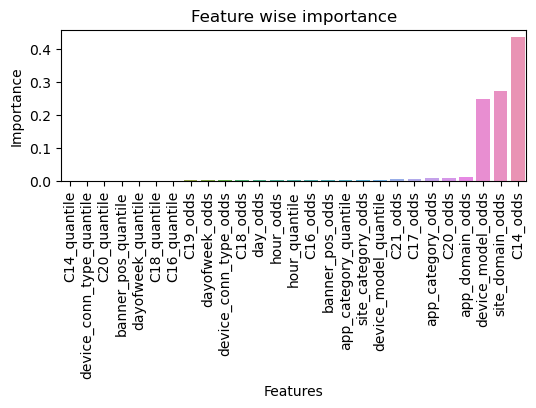

In [131]:
# Feature selection
feats = pd.DataFrame(data = final_model.feature_importances_, index = df_prepared.columns, columns = ['Importance'])
imp_feats = feats[feats['Importance'] > 0]
print(imp_feats.sort_values('Importance', ascending = False))
print('\n')
    
plt.figure(figsize=(6,2),dpi=100)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.title('Feature wise importance')
plt.xlabel('Features')
plt.xticks(rotation=90);

<b>Based on feature coefficient, we can select the important features with positive coefficient - c14, site_domain, device_model

<H1 style = "color : blue"> Summary </H1>

<H3 style = "color : brown"><b>Model implementation and building:</b><br></H3>
<b>We implemented several model but based on ROC-AUC score, Accuracy score, Best Correct Prediction and Average Score we selected following top 3 Model:

    1. Gradient Boosting Classifier - with Best Accuracy, high Precision and also 25248 correct predictions.
    2. AdaBoost  Classifier 
    3. Logistic Regression.
    
<H3 style = "color : brown"><b>Model improvement and Feature Engineering:</b><br></H3>
<b>Feature Engineering done by creating ratio of Clicked vs Non Clicked and Quantiles:
    
    1. Impression are total click per category
    2. CTR is the ratio of Clicked over total impression.
    3. Non Click ratio is Non Clicked over total impression.
    4. we find odd ratio such as CTR / Non Click Ration
    5. Quantile category 3 has above 75% of the CTR values
    6. Quantile category 2 has above 50% of the CTR values
    7. Quantile category 1 has above 25% of the CTR values
    8. Quantile category 0 has less than 25% of the CTR values
    
<H3 style = "color : brown"><b>Model Evaluation:</b><br></H3>
we are selecting Gradient Boost Classifier algorithm for following reason :
    
    1. Gives highest ROC-Accuracy score(Area under curve of ROC curve works as a good measure of model performance).
    2. Good Accuracy Score : 84.16%.
    3. Best Correct prediction : 25248 correct
    4. Average Precision score is also best.
    
